In [1]:
import numpy as np
from keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Lambda
from keras.layers import Dense
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
import cv2
import scipy
import os
%matplotlib inline
import matplotlib.pyplot as plt


/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
epochs = 20
BASE_DIR = '../'
batch_size = 32
dropout = 0.7
learning_rate = 0.0001

In [3]:
def get_model():
    model = Sequential()
    model.add(Lambda(lambda x: x * 1./255., input_shape=(120, 160, 3), output_shape=(120, 160, 3)))
    model.add(Conv2D(32, (3, 3), input_shape=(120, 160, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    rms = RMSprop(lr = learning_rate,)
    model.compile(loss='binary_crossentropy',
                optimizer=rms,
                metrics=['accuracy'])

    return model

In [4]:
model = get_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 120, 160, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 118, 158, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 118, 158, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 79, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 77, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 57, 77, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 38, 32)        0         
__________

In [5]:
def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []

    for wbc_type in os.listdir(folder):
        if not wbc_type.startswith('.'):
            if wbc_type in ['NEUTROPHIL', 'EOSINOPHIL']:
                label = 'POLYNUCLEAR'
            else:
                label = 'MONONUCLEAR'
            for image_filename in os.listdir(folder + wbc_type):
                img_file = cv2.imread(folder + wbc_type + '/' + image_filename)
                if img_file is not None:
                    # Downsample the image to 120, 160, 3
                    img_file = scipy.misc.imresize(arr=img_file, size=(120, 160, 3))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [6]:
X_train, y_train = get_data(BASE_DIR + 'images/TRAIN/')
print(y_train)
X_test, y_test = get_data(BASE_DIR + 'images/TEST/')

encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)
print(y_train)

/usr/local/lib/python2.7/dist-packages/scipy/misc/pilutil.py:480: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python2.7/dist-packages/scipy/misc/pilutil.py:483: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


['POLYNUCLEAR' 'POLYNUCLEAR' 'POLYNUCLEAR' ... 'MONONUCLEAR' 'MONONUCLEAR'
 'MONONUCLEAR']
[1 1 1 ... 0 0 0]


In [7]:
model = get_model()

# fits the model on batches
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=epochs,
    shuffle=True,
    batch_size=batch_size)

Train on 7965 samples, validate on 1992 samples
Epoch 1/20
7965/7965 [==============================] - 36s - loss: 0.6695 - acc: 0.6234 - val_loss: 0.8456 - val_acc: 0.0000e+00
Epoch 2/20
7965/7965 [==============================] - 23s - loss: 0.6613 - acc: 0.6274 - val_loss: 0.9281 - val_acc: 0.0000e+00
Epoch 3/20
7965/7965 [==============================] - 23s - loss: 0.6431 - acc: 0.6314 - val_loss: 0.9905 - val_acc: 0.0020
Epoch 4/20
7965/7965 [==============================] - 23s - loss: 0.6101 - acc: 0.6679 - val_loss: 1.7647 - val_acc: 0.0010
Epoch 5/20
7965/7965 [==============================] - 23s - loss: 0.5692 - acc: 0.7185 - val_loss: 1.3546 - val_acc: 0.0999
Epoch 6/20
7965/7965 [==============================] - 23s - loss: 0.5301 - acc: 0.7532 - val_loss: 0.8080 - val_acc: 0.3002
Epoch 7/20
7965/7965 [==============================] - 23s - loss: 0.4987 - acc: 0.7710 - val_loss: 0.9247 - val_acc: 0.2495
Epoch 8/20
7965/7965 [==============================] - 23s - 

In [8]:
model.save_weights('binary_model_epoch'+str(epochs)+'_lr'+str(learning_rate)+'_dropout'+str(dropout)+'.h5')

# Learning Curve

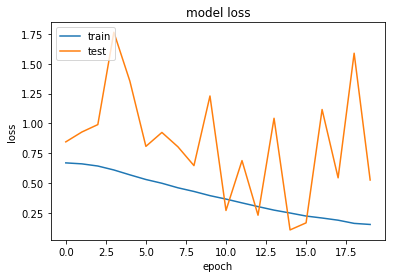

In [9]:
def plot_learning_curve(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    plt.clf()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./loss_curve.png')

plot_learning_curve(history)

# Accuracy

In [10]:
from sklearn.metrics import accuracy_score

print('Predicting on test data')
y_pred = np.rint(model.predict(X_test))

print(accuracy_score(y_test, y_pred))

Predicting on test data
0.8681141938078005


# Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[ 912  328]
 [   0 1247]]


# Images Misclassified

In [12]:
false_positive_mononuclear = np.intersect1d(np.where(y_pred == 1), np.where(y_test == 0))
print false_positive_mononuclear

[1283 1297 1307 1339 1357 1397 1423 1430 1434 1534 1563 1624 1628 1692
 1805 1819 1824 1850 1869 1872 1873 1874 1875 1877 1879 1881 1882 1883
 1885 1890 1891 1892 1893 1894 1895 1896 1897 1898 1902 1904 1905 1908
 1915 1923 1927 1930 1932 1933 1935 1937 1939 1940 1941 1944 1945 1947
 1949 1951 1952 1954 1957 1958 1959 1960 1961 1966 1968 1969 1971 1973
 1974 1975 1976 1980 1985 1986 1988 1990 1991 1993 1995 1996 1998 2001
 2002 2005 2007 2009 2010 2014 2015 2021 2022 2025 2027 2029 2032 2033
 2035 2037 2039 2040 2041 2043 2044 2047 2048 2049 2050 2052 2053 2055
 2059 2060 2061 2062 2066 2069 2072 2073 2076 2077 2078 2079 2080 2086
 2087 2091 2093 2096 2098 2101 2102 2103 2104 2109 2112 2113 2114 2115
 2117 2119 2125 2126 2127 2130 2134 2135 2138 2139 2142 2143 2146 2149
 2151 2152 2155 2157 2159 2160 2161 2164 2165 2167 2172 2173 2175 2177
 2178 2179 2180 2182 2183 2184 2189 2191 2193 2194 2195 2198 2199 2203
 2204 2206 2208 2210 2211 2214 2215 2217 2219 2221 2222 2223 2224 2226
 2230 

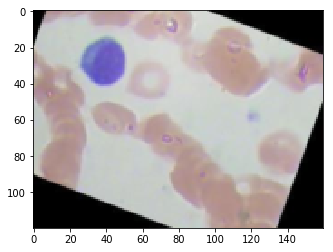

In [13]:
img = X_test[false_positive_mononuclear[0]]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Mononuclear Cells Classified Correctly

In [14]:
true_positive_mononuclear = np.intersect1d(np.where(y_pred == 1), np.where(y_test == 1))

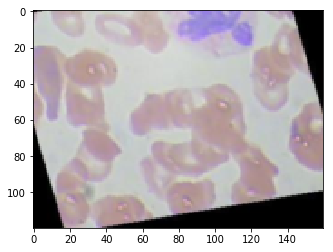

In [15]:
img = X_test[true_positive_mononuclear[0]]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

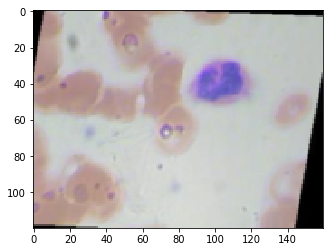

In [16]:
img = X_test[true_positive_mononuclear[5]]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

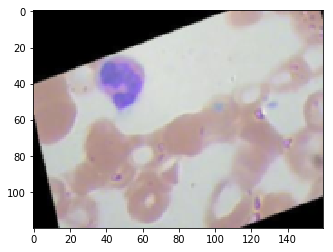

In [17]:
img = X_test[true_positive_mononuclear[8]]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Polynuclear Cells Classified Correctly

In [18]:
true_positive_polynuclear = np.intersect1d(np.where(y_pred == 0), np.where(y_test == 0))
print true_positive_polynuclear

[1247 1248 1249 1250 1251 1252 1253 1254 1255 1256 1257 1258 1259 1260
 1261 1262 1263 1264 1265 1266 1267 1268 1269 1270 1271 1272 1273 1274
 1275 1276 1277 1278 1279 1280 1281 1282 1284 1285 1286 1287 1288 1289
 1290 1291 1292 1293 1294 1295 1296 1298 1299 1300 1301 1302 1303 1304
 1305 1306 1308 1309 1310 1311 1312 1313 1314 1315 1316 1317 1318 1319
 1320 1321 1322 1323 1324 1325 1326 1327 1328 1329 1330 1331 1332 1333
 1334 1335 1336 1337 1338 1340 1341 1342 1343 1344 1345 1346 1347 1348
 1349 1350 1351 1352 1353 1354 1355 1356 1358 1359 1360 1361 1362 1363
 1364 1365 1366 1367 1368 1369 1370 1371 1372 1373 1374 1375 1376 1377
 1378 1379 1380 1381 1382 1383 1384 1385 1386 1387 1388 1389 1390 1391
 1392 1393 1394 1395 1396 1398 1399 1400 1401 1402 1403 1404 1405 1406
 1407 1408 1409 1410 1411 1412 1413 1414 1415 1416 1417 1418 1419 1420
 1421 1422 1424 1425 1426 1427 1428 1429 1431 1432 1433 1435 1436 1437
 1438 1439 1440 1441 1442 1443 1444 1445 1446 1447 1448 1449 1450 1451
 1452 

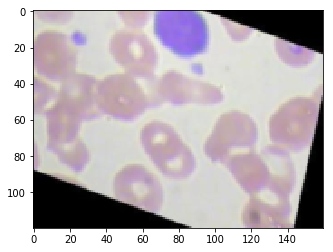

In [19]:
img = X_test[true_positive_polynuclear[21]]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

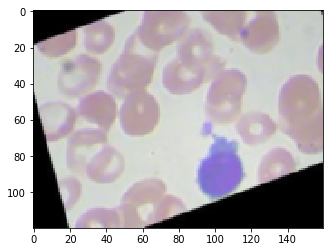

In [20]:
img = X_test[true_positive_polynuclear[53]]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

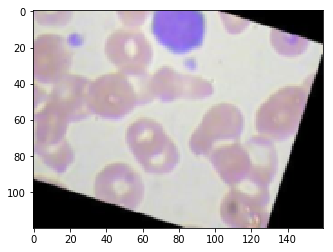

In [21]:
img = X_test[true_positive_polynuclear[16]]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))